[View in Colaboratory](https://colab.research.google.com/github/ChetanMudgal/Boston-House-Pricing/blob/master/answer_3_final.ipynb)

In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import train_test_split, validation_curve
import matplotlib.pyplot as plt


In [2]:
uploaded = files.upload()

Saving train3.csv to train3.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train3.csv" with length 11882496 bytes


In [4]:
import io
train = pd.read_csv(io.StringIO(uploaded['train3.csv'].decode('utf-8')))
train.shape

(200000, 18)

In [5]:
uploaded = files.upload()

Saving test3.csv to test3.csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test3.csv" with length 1781145 bytes


In [7]:
test = pd.read_csv(io.StringIO(uploaded['test3.csv'].decode('utf-8')))
test.shape

(41601, 15)

In [0]:
train.columns 
colms=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB']

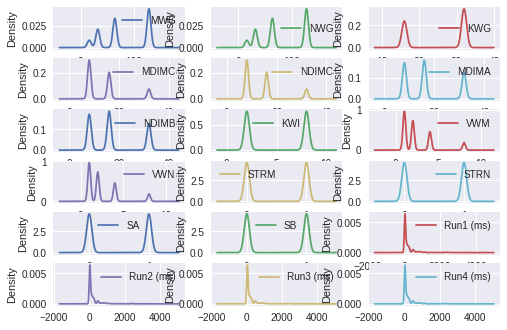

In [15]:
import matplotlib.pyplot as plt
import pandas
train.plot(kind='density', subplots=True, layout=(6,3), sharex=False)
plt.show()

In [0]:
 
train.hist()
plt.show()

In [0]:
idx=test.iloc[:,0]
test_1=test.iloc[:,1:15]

In [0]:
 for i in range(14):
  labelencoder_X = LabelEncoder()
  test_1.iloc[:, i] = labelencoder_X.fit_transform(test_1.iloc[:, i])
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
test_1 = onehotencoder.fit_transform(test_1).toarray()

In [0]:
ann = neural_network.MLPRegressor(shuffle=True,
                                  alpha=2,
                                  hidden_layer_sizes=(200, 200, 200, 200,200),
                                  tol=0,
                                  max_iter=5000, verbose=False,
                                  random_state=1000)

In [0]:
X=train.iloc[:,0:14].values
y=train.iloc[:,14:18].values
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for i in range(14):
  labelencoder_X = LabelEncoder()
  X[:, i] = labelencoder_X.fit_transform(X[:, i])
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
X = onehotencoder.fit_transform(X).toarray()
 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
ann.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=2, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200, 200, 200, 200),
       learning_rate='constant', learning_rate_init=0.001, max_iter=5000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=1000, shuffle=True, solver='adam', tol=0,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_pred = ann.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [14]:
rms

9.683106316837254

In [0]:
y_pred = ann.predict(test_1)

In [21]:
colms=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
y_prediction=pd.DataFrame(y_pred,columns=colms)
y_prediction['Run1 (ms)'].head()

0    154.026731
1    271.828659
2    166.086939
3    199.166130
4    167.029331
Name: Run1 (ms), dtype: float64

In [22]:
 from collections import OrderedDict
ans=OrderedDict([('Id', idx), ('Run1 (ms)', y_prediction['Run1 (ms)']),('Run2 (ms)', y_prediction['Run2 (ms)']),('Run3 (ms)', y_prediction['Run3 (ms)']),('Run4 (ms)', y_prediction['Run4 (ms)'])])
submission = pd.DataFrame(ans)
submission

,Id,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,Id_1,154.026731,154.516484,154.594362,154.529222
1,Id_2,271.828659,272.030878,272.197945,272.430528
2,Id_3,166.086939,166.470893,166.609798,166.506850
3,Id_4,199.166130,199.206192,199.327158,199.377301
4,Id_5,167.029331,167.609063,167.759131,167.644188
5,Id_6,252.650359,252.552692,252.743801,252.994526
6,Id_7,257.613345,257.704519,257.938432,258.137945
7,Id_8,179.973858,180.140732,180.146117,180.270938
8,Id_9,208.865205,210.216879,210.338505,209.969773
9,Id_10,243.481337,243.286973,243.465612,243.657764


In [0]:
submission.to_csv('finalsubmission1.csv', index=False)
files.download('finalsubmission1.csv')